In [1]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Specify the path to your dataset
file_path = '/content/drive/My Drive/archive/PlantVillage'

In [5]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
img_size=256
batch_size=32
CHANNELS=3
EPOCHS=5

In [7]:
# loading into dataset
dataset=tf.keras.preprocessing.image_dataset_from_directory(file_path,
                                                   shuffle=True,
                                                   image_size=(img_size,img_size),
                                                   batch_size=batch_size)

Found 340 files belonging to 3 classes.


In [8]:
# total number of batches
len(dataset)


11

In [9]:
# creating class names
cnames=dataset.class_names
cnames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

11

In [11]:
# storing into batches
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)
#     print(label_batch.numpy())

(256, 256, 3)


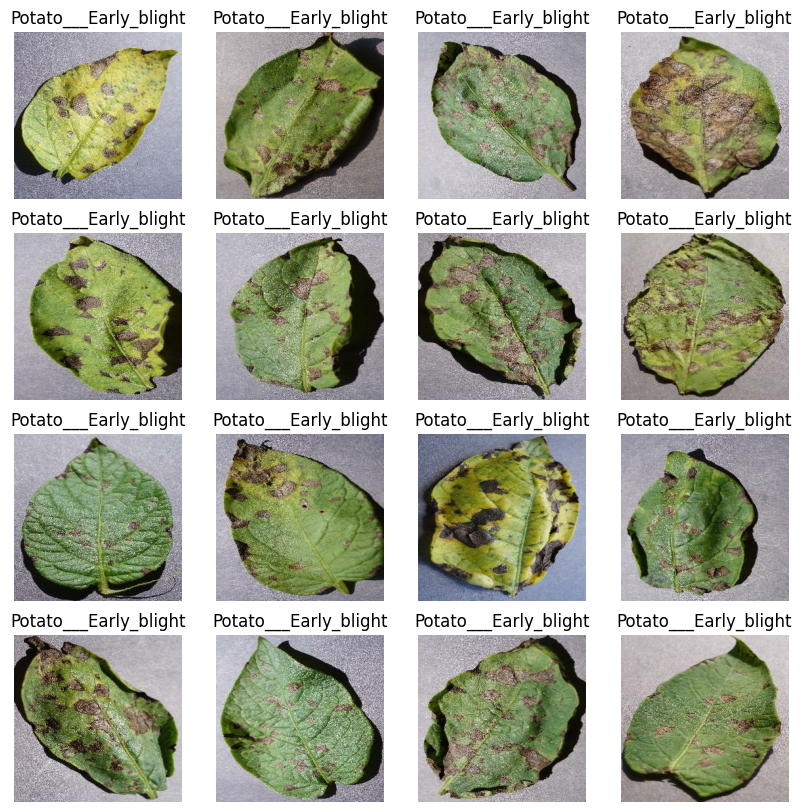

In [12]:
#visualizing images
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(cnames[label_batch[i]])
        plt.axis("off")

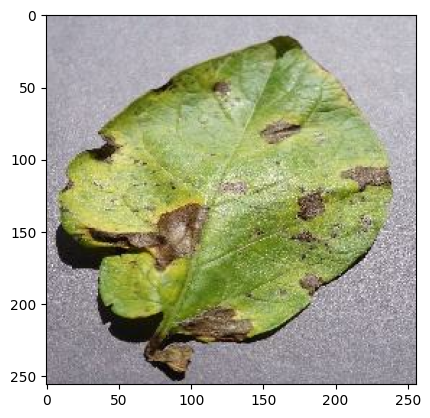

In [13]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))

In [14]:
len(dataset)

11

In [15]:
# creating training dataset
train_size = 0.8
len(dataset)*train_size

8.8

In [16]:
train_ds = dataset.take(54)
len(train_ds)

11

In [17]:
train_ds = dataset.take(54)
len(train_ds)

11

In [18]:
# creating validating dataset
val_size=0.1
len(dataset)*val_size

1.1

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [21]:
# TESTING DATASET
test_ds = test_ds.skip(6)
len(test_ds)

0

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

8

In [25]:
len(val_ds)

1

In [26]:
len(test_ds)

2

In [27]:
#cache,shuffle,prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
# IMAGE PREPROCESSING
# RESIZING AND NORMALIZING OF IMAGES
IMAGE_SIZE = 224

IMAGE_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.Rescaling(1./255),
])

In [29]:
!pip install tensorflow
!pip install keras

In [30]:
#DATA AUUGMENTATION
from keras.preprocessing.image import ImageDataGenerator
data_augmentation = ImageDataGenerator(
  horizontal_flip=True,
  vertical_flip=True,
  rotation_range=0.2
)
# print(data_augmentation)

In [31]:
# building CNN MODEL
input_shape = (batch_size, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 52, 52, 64)         

In [33]:
#compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
8/8 [==============================] - 48s 5s/step - loss: 0.3514 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 27s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 26s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 27s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 26s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [35]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [36]:
# Scores is just a list containing loss and accuracy value
scores

[0.0, 1.0]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 8}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
type(history.history['loss'])

list

In [41]:
len(history.history['loss'])

5

In [42]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.35137397050857544, 0.0, 0.0, 0.0, 0.0]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

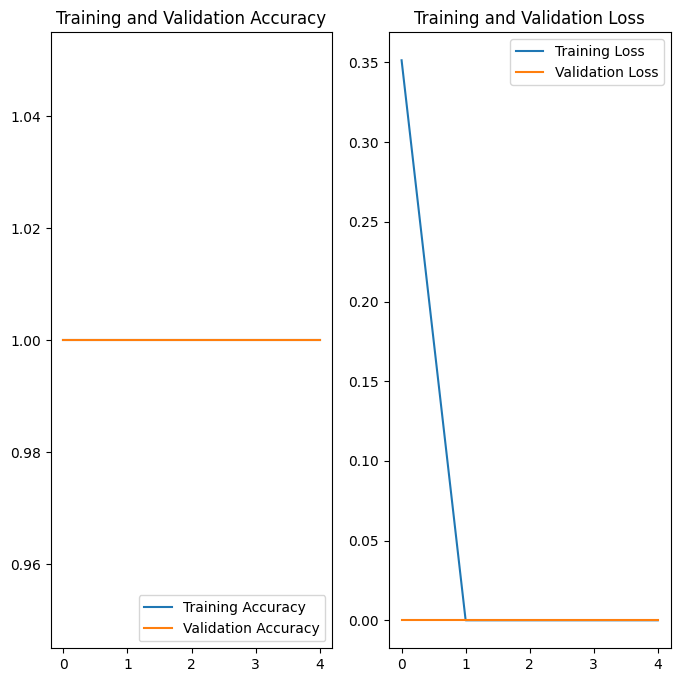

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Early_blight


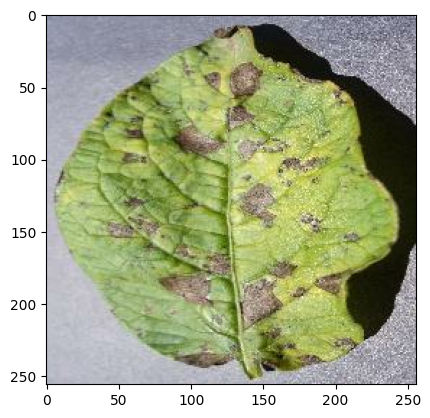

In [45]:
# running prediction on a sample image
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",cnames[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",cnames[np.argmax(batch_prediction[0])])

In [46]:
#function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = cnames[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 132ms/step


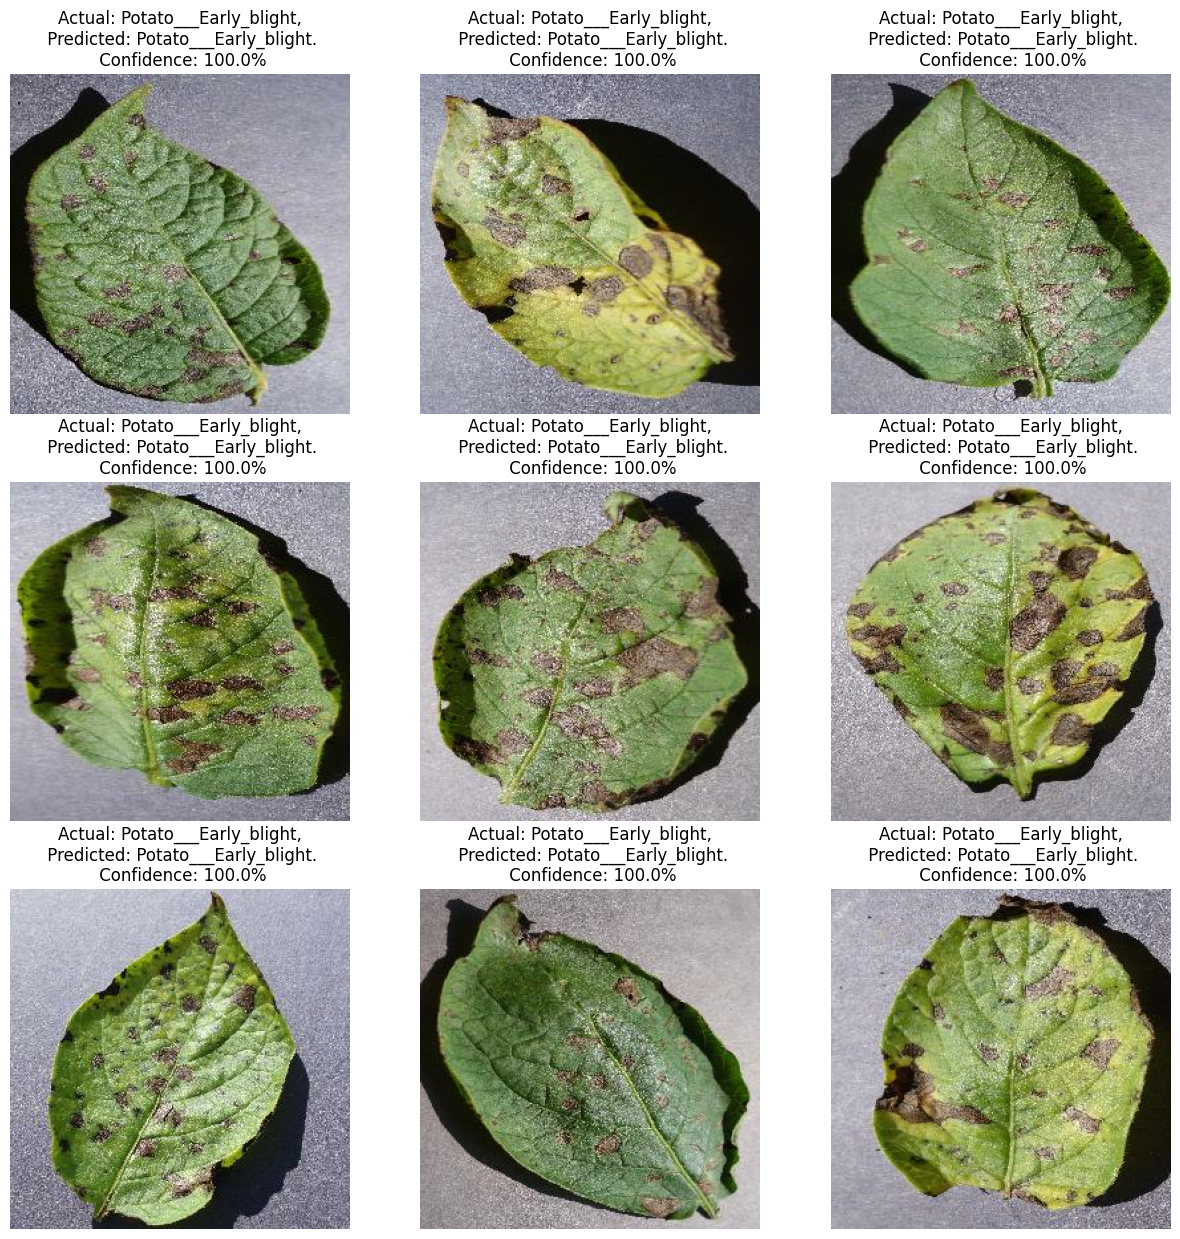

In [47]:
# running inference on few sample images
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = cnames[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")